In [1]:
import os
import sys
# Go up one level from the notebooks directory to reach project root
project_root = os.path.abspath(os.path.join(os.path.dirname('__file__'), '..'))
sys.path.insert(0, project_root)  # Insert at beginning of path to take precedence

import numpy as np
import matplotlib.pyplot as plt
from mssfp import BrainDataset, generate_ssfp_dataset, plot_dataset

In [2]:
# Create a brain dataset
dataset = BrainDataset('./data')
print(dataset)
dataset.print_info()

BrainDataset(path=./data, num_images=5, total_slices=1810)
Dataset Summary:
Number of image files: 5
Total slices across all images: 1810

Per-image details:
Image 0: 362 slices, shape (362, 434, 362)
Image 1: 362 slices, shape (362, 434, 362)
Image 2: 362 slices, shape (362, 434, 362)
Image 3: 362 slices, shape (362, 434, 362)
Image 4: 362 slices, shape (362, 434, 362)


Generating phantom...
Generating 3D phantom: (1, 434, 362)
Generating SSFP dataset...
Dataset complete.
Dataset shape: (1, 128, 128, 4)
(1, 128, 128, 4)


c:\Users\mmend\projects\mri\ssfp\mssfp\simulations\ssfp.py:64: RuntimeWarning: divide by zero encountered in divide
  E1 = np.where(T1 > 0, np.exp(-TR / T1), 0)
c:\Users\mmend\projects\mri\ssfp\mssfp\simulations\ssfp.py:65: RuntimeWarning: divide by zero encountered in divide
  E2 = np.where(T2 > 0, np.exp(-TR / T2), 0)
c:\Users\mmend\projects\mri\ssfp\mssfp\simulations\ssfp.py:91: RuntimeWarning: divide by zero encountered in divide
  T2_decay = np.where(T2 > 0, np.exp(-TE / T2), 0)


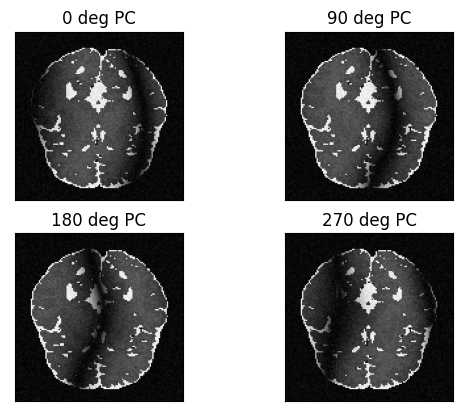

In [3]:
data = generate_ssfp_dataset(phantom_type='brain', shape=128, npcs=4, f=500, alpha=np.deg2rad(60), sigma=0.01, data_indices=[(0,1), 150], useRotate=True, useDeform=True, fn_sigma=0, fn_offset=250)
print(data['M'].shape)
plot_dataset(data['M'], slice=0)

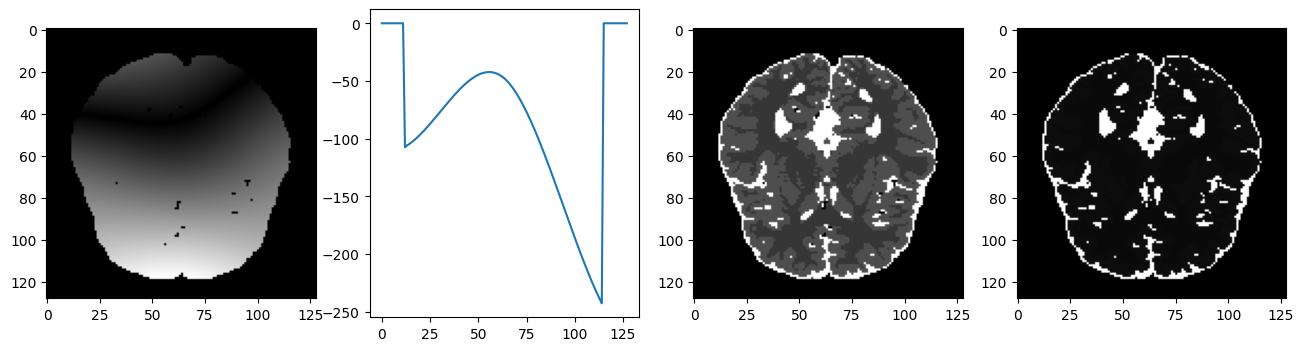

In [27]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 4, 1)
plt.imshow(np.abs(data['fieldmap'][0]))
plt.subplot(1, 4, 2)
plt.plot(data['fieldmap'][0][50,:])
plt.subplot(1, 4, 3)
plt.imshow(np.abs(data['t1'][0]))
plt.subplot(1, 4, 4)
plt.imshow(np.abs(data['t2'][0]))
plt.show()

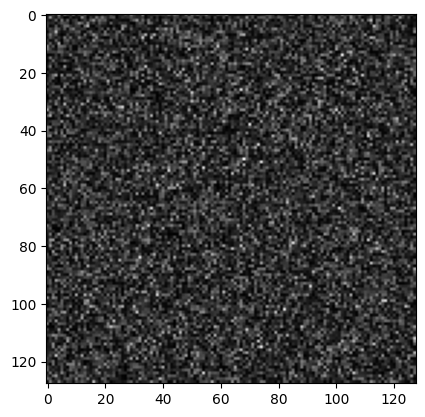

In [35]:
slice = 0
plt.imshow(np.abs(data['M'][slice, :, :, 0].real))
plt.show()

Generating 3D phantom: (1200, 434, 362)


100%|██████████| 1/1 [00:29<00:00, 29.27s/it]


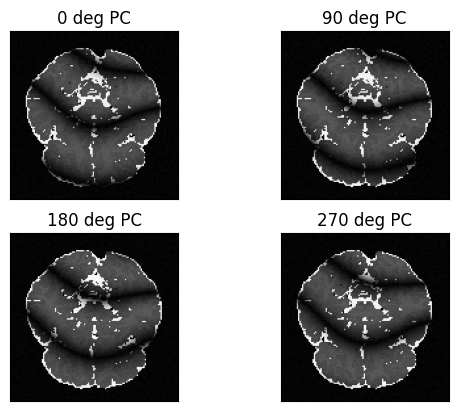

In [6]:
data = generate_ssfp_dataset(phantom_type='brain', shape=128, npcs=4, f=500, alpha=np.deg2rad(60), sigma=0.005, data_indices=[(None, None), (120,180)], useRotate=True, useDeform=True)
plot_dataset(data['M'], slice=0)

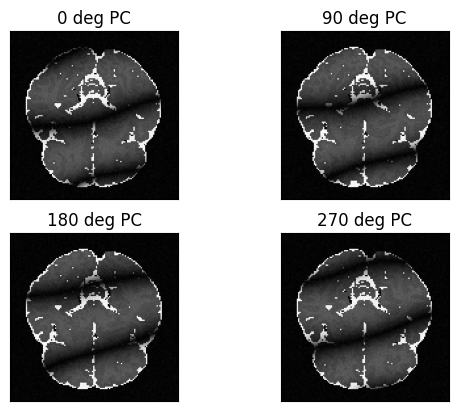

In [7]:
plot_dataset(data['M'], slice=6)